In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import Histogram, Threshold, padding, gaussian_filtering
from PIL import Image


img = Image.open("./res/dave.jpg").convert("L")
img = np.asarray(img)

plt.imshow(img, cmap="gray")

In [4]:
"""
ref
- https://en.wikipedia.org/wiki/Edge_detection
- http://www.cs.cmu.edu/~16385/s17/Slides/4.0_Image_Gradients_and_Gradient_Filtering.pdf
- https://iskim3068.tistory.com/49
"""
def sobel_kerenl():
    kernel_x = np.array([
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]
    ])
    kernel_y = np.array([
        [1, 2, 1],
        [0, 0, 0],
        [-1, -2, -1]
    ])
    return kernel_x, kernel_y

def sobel(img, method=None):
    """
    get image gradient using sobel operater
    
    parameteres
    ------------
    img : input image applying sobel filter
    method : 1(x direction), 2(y dicrection), 3(x + y direction)
    """
    k_size = 3
    rows, cols = img.shape
    kernel_x, kernel_y = sobel_kerenl()
    pad_img = padding(img, k_size=k_size)
    res_img = np.zeros((rows,cols))
    sx, sy = 0, 0

    for i in range(0, rows):
        for j in range(0, cols):
            boundary = pad_img[i:i+k_size, j:j+k_size]
            if method == 1:
                sx = np.sum(kernel_x * boundary)
            elif method == 2:
                sy = np.sum(kernel_y * boundary)
            else:
                sx = np.sum(kernel_x * boundary)
                sy = np.sum(kernel_y * boundary)
            res_img[i,j] = np.sqrt(sx**2 + sy**2)
    
    return res_img

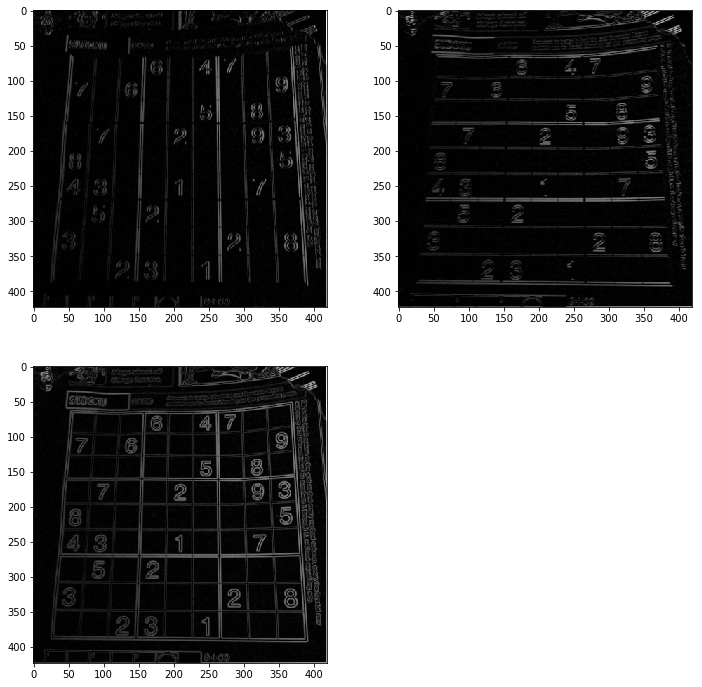

In [5]:
plt.figure(figsize=(12,12))
for i in range(1, 4):
    plt.subplot(2, 2, i)
    sobel_img = sobel(img, method=i)
    plt.imshow(sobel_img,cmap="gray")

In [14]:
def laplacian_filter():
    kernel_x = np.array([
        [0, 1, 0],
        [1, -4, 1],
        [0, 1, 0]
    ])
    kernel_y = np.array([
        [0, -1, 0],
        [-1, 4, -1],
        [0, -1, 0]
    ])
    return kernel_x, kernel_y


def laplacian(img):
    """
    get image gradient using laplacian filter
    
    parameteres
    ------------
    img : input image applying laplacian filter
    """
    k_size = 3
    rows, cols = img.shape
    kernel_x, kernel_y = laplacian_filter()
    pad_img = padding(img, k_size=k_size)
    res_img = np.zeros((rows,cols))
    sx, sy = 0, 0

    for i in range(0, rows):
        for j in range(0, cols):
            boundary = pad_img[i:i+k_size, j:j+k_size]
            sx = np.sum(kernel_x * boundary)
            sy = np.sum(kernel_y * boundary)
            res_img[i,j] = np.sqrt(sx**2 + sy**2)    
    return res_img

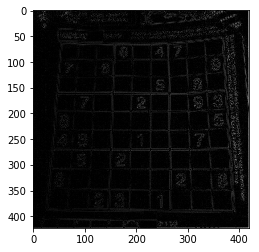

In [15]:
laplacian_img = laplacian(img)
plt.imshow(laplacian_img,cmap="gray")